In [109]:
from dataset.tiny_celebrities import train_loader
import matplotlib.pyplot as plt
import einops

In [110]:
example = next(iter(train_loader))
image = example['image']

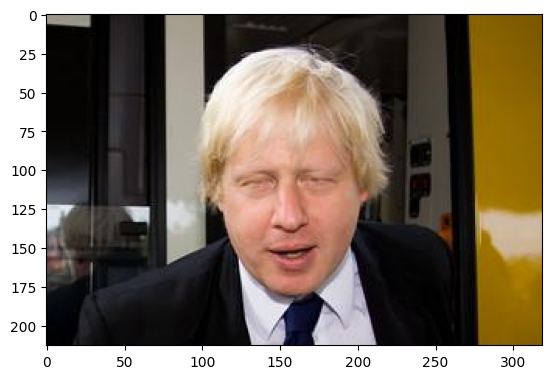

In [111]:
plt.imshow(einops.rearrange(image, '1 c h w -> h w c'))

In [112]:
from face import align_faces, assess_quality

In [113]:
assess_quality(image)

(1,
 [{'confidence': np.float64(0.9987647533416748),
   'roll': np.float64(-3.01278750418334),
   'pitch': np.float64(-20.65308568004795),
   'yaw': np.float64(-2.475836431226753)}])

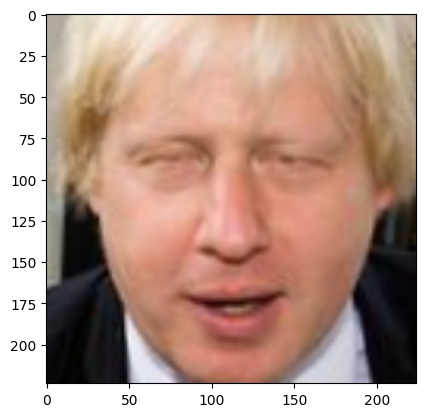

In [114]:
for face_image in align_faces(image, min_confidence=0.98):
    plt.imshow(einops.rearrange(face_image, 'c h w -> h w c'))
    plt.show()

In [115]:
batched_face_image = einops.rearrange(face_image, 'c h w -> 1 c h w')

In [116]:
from resnet import feature_extractor

In [117]:
features = feature_extractor.forward(batched_face_image)
features.shape

torch.Size([1, 2048])